# Telecom Churn Case Study

In [1]:
# Importing libraries
import pandas as pd
pd.options.display.max_columns = 300
pd.options.display.max_rows = 999
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading dataset
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Reviewing first 2 rows
telecom.head(2)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              2.91              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           nan           nan          0.00           nan               nan   
1         35.39        150.51        299.54         72.11              0.23   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0               nan              0.00               nan               nan   
1              4.11              0.00              0.00              0.00   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0               nan              0.00               nan               nan   
1              0.46              0.13              0.00              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
0               nan              0.00               nan               nan   
1              0.00              0.00              0.00              0.00   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  \
0               nan              0.00               nan           nan   
1              0.00              0.00              0.00          0.23   

   std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0           nan          0.00           nan           nan           nan   
1          4.58          0.13          0.00          0.00          0.00   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0          0.00           nan           nan           nan          0.00   
1          0.00          0.00          4.68         23.43         12.76   

   spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
0           nan          nan          nan       

In [4]:
# Reviewing if data is properly read
telecom.shape

(99999, 226)

In [5]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

In [13]:
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [12]:
for i in telecom.columns:
    print(telecom[i].value_counts())
    print('\n')

7002374769    1
7001115332    1
7000945323    1
7001852588    1
7000146605    1
7001306145    1
7000150703    1
7002072271    1
7001815730    1
7001551539    1
7001279156    1
7000759698    1
7001938614    1
7000363703    1
7001941142    1
7000997179    1
7001029442    1
7000771260    1
7000125682    1
7000667800    1
7001166527    1
7000630393    1
7000728257    1
7001209514    1
7000285865    1
7000053447    1
7000162965    1
7001733395    1
7001521153    1
7001928331    1
7000992999    1
7001427443    1
7001614992    1
7000564369    1
7001356946    1
7000951444    1
7001796407    1
7000658599    1
7001712469    1
7001419386    1
7000050332    1
7002169068    1
7000904910    1
7000138401    1
7000937467    1
7000011427    1
7000363617    1
7002051465    1
7001506501    1
7000332934    1
7000556031    1
7000285929    1
7000387102    1
7002387179    1
7001328364    1
7001639515    1
7000019695    1
7001549552    1
7000505074    1
7001289459    1
7000230644    1
7002028606    1
70004968

0.00       79116
1.01          60
0.03          34
1.03          33
0.68          32
0.86          31
0.26          31
0.71          31
0.08          31
0.05          31
0.41          31
0.40          30
0.33          30
0.36          29
0.48          28
0.46          28
0.23          28
0.20          28
0.81          27
0.56          27
0.91          27
0.93          27
0.98          27
0.43          27
0.55          26
0.61          26
0.53          26
1.61          26
0.45          26
0.30          26
0.10          25
0.18          25
0.21          25
0.25          25
1.96          25
0.35          24
0.15          24
0.76          24
0.66          23
0.38          23
1.06          23
1.36          23
0.63          23
1.93          23
1.11          23
0.78          23
1.88          22
0.96          22
2.03          22
0.58          22
1.08          21
0.16          21
1.28          21
0.50          21
2.13          21
0.11          21
1.53          21
0.51          20
1.48          

0.00       51977
0.51          62
0.48          60
0.58          58
0.38          57
0.71          56
0.31          56
0.78          54
0.33          54
0.46          54
1.01          53
0.30          52
0.61          52
0.21          51
0.63          51
0.35          51
0.41          51
1.06          50
0.36          49
0.91          48
0.73          46
0.45          46
0.01          45
0.43          45
0.66          45
0.55          45
0.60          44
0.96          44
0.26          43
0.23          43
0.28          43
0.75          43
0.81          41
0.50          41
1.16          41
0.03          40
0.25          40
0.76          40
0.40          40
0.15          40
1.03          39
0.53          39
0.18          38
0.56          38
0.83          38
1.08          37
0.85          36
0.68          36
0.93          36
0.13          36
0.16          36
1.23          35
0.90          35
0.65          35
0.20          35
1.13          35
1.26          35
2.01          35
0.86          

0.00       14143
0.21          81
0.20          49
0.43          35
1.01          33
0.01          32
0.25          32
0.15          29
0.26          28
0.03          26
0.61          25
0.40          25
0.16          24
0.68          24
0.05          24
0.41          24
0.46          23
2.33          23
0.63          23
0.11          23
0.66          22
0.35          21
0.56          20
0.36          20
0.38          19
1.13          19
0.48          19
0.31          19
1.26          19
0.83          19
0.76          18
0.51          18
2.01          18
0.23          18
0.18          18
1.83          18
0.06          17
1.23          17
2.71          17
0.28          17
1.06          17
1.18          17
0.55          17
2.38          17
2.46          17
2.13          17
0.70          16
0.10          16
0.93          16
0.30          16
0.98          16
0.53          15
0.78          15
12.34         15
16.48         15
0.80          15
2.91          15
0.88          15
1.08          

0.00      73994
0.33        175
0.26        152
0.31        142
0.36        142
0.41        138
0.23        137
0.51        133
0.46        133
0.63        132
0.43        130
0.56        125
0.50        123
0.30        122
0.38        121
0.28        120
0.25        119
0.58        119
0.35        119
0.18        118
0.48        117
0.21        116
0.45        113
0.71        112
0.13        111
0.11        107
0.40        107
0.15        107
0.10        106
0.53        106
0.20        104
0.78        102
0.91        100
0.61         99
0.98         98
0.96         94
0.66         93
0.76         91
0.55         90
0.16         88
0.83         86
0.68         86
0.93         85
1.01         84
0.08         83
1.08         82
0.60         82
0.80         81
0.73         79
0.81         79
1.26         76
1.11         75
0.65         74
0.75         73
0.88         73
0.86         71
1.13         68
1.06         68
0.85         67
1.16         67
1.83         64
0.95         64
1.28    

7/31/2014    17288
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     3998
7/19/2014     3057
7/22/2014     2969
7/20/2014     2892
7/17/2014     2737
7/16/2014     2458
7/23/2014     2302
7/21/2014     1640
7/15/2014     1562
7/18/2014     1280
7/10/2014      859
7/9/2014       827
7/12/2014      732
7/14/2014      452
7/11/2014      408
7/13/2014      324
7/6/2014       313
7/4/2014       251
7/8/2014       201
7/7/2014       153
7/3/2014       153
7/5/2014       125
7/1/2014        74
7/2/2014        68
Name: date_of_last_rech_7, dtype: int64


8/31/2014    14706
8/30/2014    11707
8/29/2014    10057
8/28/2014     9816
8/26/2014     9297
8/24/2014     7722
8/25/2014     7655
8/27/2014     5688
8/22/2014     2017
8/20/2014     1986
8/23/2014     1806
8/19/2014     1590
8/21/2014     1347
8/18/2014     1027
8/9/2014       984
8/5/2014       943
8/14/2014      890
8/15/2014      813
8/16/2014      756
8/17/201

0     93574
1      4890
2      1147
3       241
4        81
5        35
6        12
8         7
7         7
11        3
9         2
Name: monthly_3g_9, dtype: int64


0     95818
1      2990
2       607
3       216
4       108
5        65
6        45
7        45
9        24
8        20
11       12
10       12
15        5
12        4
14        4
19        4
13        3
18        3
22        3
23        3
16        2
17        2
29        2
28        1
21        1
Name: sachet_3g_6, dtype: int64


0     95869
1      2810
2       635
3       229
4       129
5       102
6        64
7        34
8        20
9        20
11       14
10       13
12       13
15        7
14        7
13        6
18        5
19        4
17        3
20        3
22        3
16        2
21        2
24        2
33        1
31        1
35        1
Name: sachet_3g_7, dtype: int64


0     95809
1      2784
2       638
3       272
4       143
5       105
6        57
7        45
8        33
9        21
10       17
12       

In [7]:
# Reviewing feature types
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

# Data Preparation and Filtering

### Missing Values Treatment

In [8]:
values = pd.DataFrame(telecom.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

index   null
2              loc_og_t2o_mou   1018
3              std_og_t2o_mou   1018
4              loc_ic_t2o_mou   1018
6        last_date_of_month_7    601
7        last_date_of_month_8   1100
8        last_date_of_month_9   1659
13                onnet_mou_6   3937
14                onnet_mou_7   3859
15                onnet_mou_8   5378
16                onnet_mou_9   7745
17               offnet_mou_6   3937
18               offnet_mou_7   3859
19               offnet_mou_8   5378
20               offnet_mou_9   7745
21              roam_ic_mou_6   3937
22              roam_ic_mou_7   3859
23              roam_ic_mou_8   5378
24              roam_ic_mou_9   7745
25              roam_og_mou_6   3937
26              roam_og_mou_7   3859
27              roam_og_mou_8   5378
28              roam_og_mou_9   7745
29           loc_og_t2t_mou_6   3937
30           loc_og_t2t_mou_7   3859
31           loc_og_t2t_mou_8   5378
32           loc_og_t2t_mou_9   7745
33           loc_og_t2m_mou_6   3937
34           loc_og_t2m_mou_7   3859
35           loc_og_t2m_mou_8   5378
36           loc_og_t2m_mou_9   7745
37           loc_og_t2f_mou_6   3937
38           loc_og_t2f_mou_7   3859
39           loc_og_t2f_mou_8   5378
40           loc_og_t2f_mou_9   7745
41           loc_og_t2c_mou_6   3937
42           loc_og_t2c_mou_7   3859
43           loc_og_t2c_mou_8   5378
44           loc_og_t2c_mou_9   7745
45               loc_og_mou_6   3937
46               loc_og_mou_7   3859
47               loc_og_mou_8   5378
48               loc_og_mou_9   7745
49           std_og_t2t_mou_6   3937
50           std_og_t2t_mou_7   3859
51           std_og_t2t_mou_8   5378
52           std_og_t2t_mou_9   7745
53           std_og_t2m_mou_6   3937
54           std_og_t2m_mou_7   3859
55           std_og_t2m_mou_8   5378
56           std_og_t2m_mou_9   7745
57           std_og_t2f_mou_6   3937
58           std_og_t2f_mou_7   3859
59           std_og_t2f_mou_8   5378
60           std_og_t2f_mou_9   7745
61           std_og_t2c_mou_6   3937
62           std_og_t2c_mou_7   3859
63           std_og_t2c_mou_8   5378
64           std_og_t2c_mou_9   7745
65               std_og_mou_6   3937
66               std_og_mou_7   3859
67               std_og_mou_8   5378
68               std_og_mou_9   7745
69               isd_og_mou_6   3937
70               isd_og_mou_7   3859
71               isd_og_mou_8   5378
72               isd_og_mou_9   7745
73               spl_og_mou_6   3937
74               spl_og_mou_7   3859
75               spl_og_mou_8   5378
76               spl_og_mou_9   7745
77                og_others_6   3937
78                og_others_7   3859
79                og_others_8   5378
80                og_others_9   7745
85           loc_ic_t2t_mou_6   3937
86           loc_ic_t2t_mou_7   3859
87           loc_ic_t2t_mou_8   5378
88           loc_ic_t2t_mou_9   7745
89           loc_ic_t2m_mou_6   3937
90           loc_ic_t2m_mou_7   3859
91           loc_ic_t2m_mou_8   5378
92           loc_ic_t2m_mou_9   7745
93           loc_ic_t2f_mou_6   3937
94           loc_ic_t2f_mou_7   3859
95           loc_ic_t2f_mou_8   5378
96           loc_ic_t2f_mou_9   7745
97               loc_ic_mou_6   3937
98               loc_ic_mou_7   3859
99               loc_ic_mou_8   5378
100              loc_ic_mou_9   7745
101          std_ic_t2t_mou_6   3937
102          std_ic_t2t_mou_7   3859
103          std_ic_t2t_mou_8   5378
104          std_ic_t2t_mou_9   7745
105          std_ic_t2m_mou_6   3937
106          std_ic_t2m_mou_7   3859
107          std_ic_t2m_mou_8   5378
108          std_ic_t2m_mou_9   7745
109          std_ic_t2f_mou_6   3937
110          std_ic_t2f_mou_7   3859
111          std_ic_t2f_mou_8   5378
112          std_ic_t2f_mou_9   7745
113          std_ic_t2o_mou_6   3937
114          std_ic_t2o_mou_7   3859
115          std_ic_t2o_mou_8   5378
116          std_ic_t2o_mou_9   7745
117              std_ic_mou_6   3937
118              std_ic_mou_

## Perform Imputation 

### Impute with 0

In [9]:
zero_imputation=['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8']
for i in zero_imputation:
    telecom[i].fillna(0, inplace=True)

### Separate Good Phase Data

In [10]:
telecom['good_phase_cust'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] +((telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']) +
                                         (telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7'])))

### Filtering High Value Customers considering 70 Percentile of Good Phase Data

In [11]:
telecom_1 = telecom[telecom['good_phase_cust'] > telecom['good_phase_cust'].quantile(0.7)]

In [12]:
telecom_1.loc[:,'churn'] = 0

telecom_1.loc[(telecom_1['total_ic_mou_9'] == 0) &
    (telecom_1['total_og_mou_9'] == 0) &
    (telecom_1['vol_2g_mb_9'] == 0) &
    (telecom_1['vol_3g_mb_9'] == 0), ['churn']] = 1

telecom_1['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [13]:
# Confirming the counts of high value customer match the counts given by Upgrad
telecom_1.shape

(29953, 228)

### Tagging Churners and dropping the data for September

In [14]:
nine_month_var=['last_date_of_month_9', 'sep_vbc_3g','arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']

In [15]:
# Confirming the counts after dropping the Sep data
telecom_1 = telecom_1.drop(nine_month_var, axis=1)
telecom_1.shape

(29953, 173)

### Reviewing missing values in filtered dataset

In [16]:
values = pd.DataFrame(telecom_1.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

index   null
2              loc_og_t2o_mou    223
3              std_og_t2o_mou    223
4              loc_ic_t2o_mou    223
6        last_date_of_month_7     27
7        last_date_of_month_8    165
11                onnet_mou_6    542
12                onnet_mou_7    536
13                onnet_mou_8   1172
14               offnet_mou_6    542
15               offnet_mou_7    536
16               offnet_mou_8   1172
17              roam_ic_mou_6    542
18              roam_ic_mou_7    536
19              roam_ic_mou_8   1172
20              roam_og_mou_6    542
21              roam_og_mou_7    536
22              roam_og_mou_8   1172
23           loc_og_t2t_mou_6    542
24           loc_og_t2t_mou_7    536
25           loc_og_t2t_mou_8   1172
26           loc_og_t2m_mou_6    542
27           loc_og_t2m_mou_7    536
28           loc_og_t2m_mou_8   1172
29           loc_og_t2f_mou_6    542
30           loc_og_t2f_mou_7    536
31           loc_og_t2f_mou_8   1172
32           loc_og_t2c_mou_6    542
33           loc_og_t2c_mou_7    536
34           loc_og_t2c_mou_8   1172
35               loc_og_mou_6    542
36               loc_og_mou_7    536
37               loc_og_mou_8   1172
38           std_og_t2t_mou_6    542
39           std_og_t2t_mou_7    536
40           std_og_t2t_mou_8   1172
41           std_og_t2m_mou_6    542
42           std_og_t2m_mou_7    536
43           std_og_t2m_mou_8   1172
44           std_og_t2f_mou_6    542
45           std_og_t2f_mou_7    536
46           std_og_t2f_mou_8   1172
47           std_og_t2c_mou_6    542
48           std_og_t2c_mou_7    536
49           std_og_t2c_mou_8   1172
50               std_og_mou_6    542
51               std_og_mou_7    536
52               std_og_mou_8   1172
53               isd_og_mou_6    542
54               isd_og_mou_7    536
55               isd_og_mou_8   1172
56               spl_og_mou_6    542
57               spl_og_mou_7    536
58               spl_og_mou_8   1172
59                og_others_6    542
60                og_others_7    536
61                og_others_8   1172
65           loc_ic_t2t_mou_6    542
66           loc_ic_t2t_mou_7    536
67           loc_ic_t2t_mou_8   1172
68           loc_ic_t2m_mou_6    542
69           loc_ic_t2m_mou_7    536
70           loc_ic_t2m_mou_8   1172
71           loc_ic_t2f_mou_6    542
72           loc_ic_t2f_mou_7    536
73           loc_ic_t2f_mou_8   1172
74               loc_ic_mou_6    542
75               loc_ic_mou_7    536
76               loc_ic_mou_8   1172
77           std_ic_t2t_mou_6    542
78           std_ic_t2t_mou_7    536
79           std_ic_t2t_mou_8   1172
80           std_ic_t2m_mou_6    542
81           std_ic_t2m_mou_7    536
82           std_ic_t2m_mou_8   1172
83           std_ic_t2f_mou_6    542
84           std_ic_t2f_mou_7    536
85           std_ic_t2f_mou_8   1172
86           std_ic_t2o_mou_6    542
87           std_ic_t2o_mou_7    536
88           std_ic_t2o_mou_8   1172
89               std_ic_mou_6    542
90               std_ic_mou_7    536
91               std_ic_mou_8   1172
95               spl_ic_mou_6    542
96               spl_ic_mou_7    536
97               spl_ic_mou_8   1172
98               isd_ic_mou_6    542
99               isd_ic_mou_7    536
100              isd_ic_mou_8   1172
101               ic_others_6    542
102               ic_others_7    536
103               ic_others_8   1172
113       date_of_last_rech_6     73
114       date_of_last_rech_7     98
115       date_of_last_rech_8    582
119  date_of_last_rech_data_6  13213
120  date_of_last_rech_data_7  12915
121  date_of_last_rech_data_8  14018
128           count_rech_2g_6  13213
129           count_rech_2g_7  12915
130           count_rech_2g_8  14018
131           count_rech_3g_6  13213
132           count_rech_3g_7  12915
133           count_rech_3g_8  14018
143                 arpu_3g_6  13213
144                 arpu_3g_7  12915
145                 arpu_3g_8  14018
146                 arpu_2g_

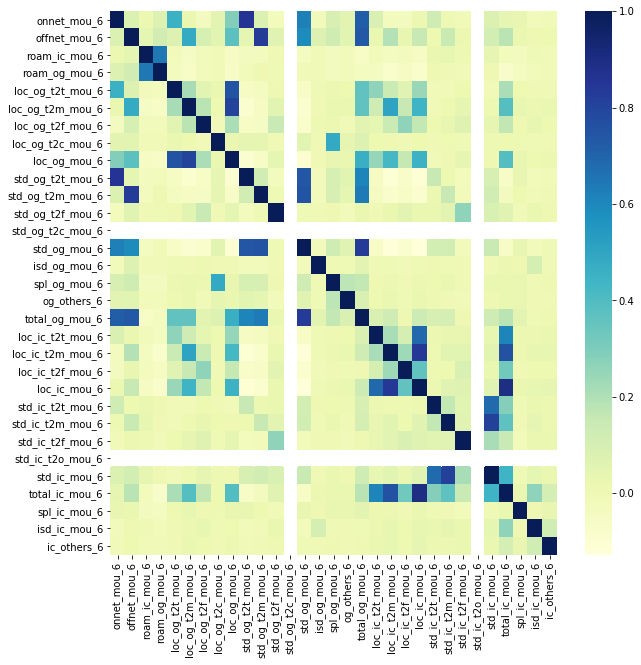

In [17]:
# Checking corelation in numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(telecom_1[['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].corr(),cmap="YlGnBu")
plt.show()

## Analysis of Data for June

Incoming Calls

In [18]:
# Local Incoming Calls
temp = pd.DataFrame(telecom_1['loc_ic_mou_6'] -
                    (telecom_1['loc_ic_t2t_mou_6'] + telecom_1['loc_ic_t2m_mou_6'] +telecom_1['loc_ic_t2f_mou_6'])
                   )
print("Local incoming calls for June")
print(temp.describe())

# Std Incoming calls
temp = pd.DataFrame(telecom_1['std_ic_mou_6'] -
             (telecom_1['std_ic_t2t_mou_6'] + telecom_1['std_ic_t2m_mou_6'] + telecom_1['std_ic_t2f_mou_6']+telecom_1['std_ic_t2o_mou_6'])
            )
print("Std incoming calls for June")
print(temp.describe())

# Total incoming calls
temp = pd.DataFrame(telecom_1['total_ic_mou_6'] -
             (telecom_1['loc_ic_mou_6']+ telecom_1['std_ic_mou_6']+ telecom_1['isd_ic_mou_6']+
              telecom_1['spl_ic_mou_6']+ telecom_1['ic_others_6'])
            )
print("Total incoming calls for June")
print(temp.describe())

Local incoming calls for June
             0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.01
50%       0.01
75%       0.01
max       0.02
Std incoming calls for June
             0
count 29411.00
mean      0.00
std       0.01
min      -0.00
25%       0.00
50%       0.00
75%       0.01
max       0.02
Total incoming calls for June
             0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.04


Outgoing Calls

In [19]:
# Local outgoing calls 
temp = pd.DataFrame(telecom_1['loc_og_mou_6'] -
                    (telecom_1['loc_og_t2t_mou_6'] + telecom_1['loc_og_t2m_mou_6'] +telecom_1['loc_og_t2f_mou_6'])
                   )
print("Local outgoing calls for June")
print(temp.describe())

# Analyzing all the std outgoing calls for month 6
temp = pd.DataFrame(telecom_1['std_og_mou_6'] -
             (telecom_1['std_og_t2t_mou_6'] + telecom_1['std_og_t2m_mou_6'] + telecom_1['std_og_t2f_mou_6'])
            )
print("Std outgoing calls for June")
print(temp.describe())

# Analyzing total outgoing calls for month 6
temp = pd.DataFrame(telecom_1['total_og_mou_6'] -
             (telecom_1['loc_og_mou_6']+ telecom_1['std_og_mou_6']+ telecom_1['isd_og_mou_6']+
              telecom_1['spl_og_mou_6']+ telecom_1['og_others_6'])
            )
            
print("Total outgoing calls for June")
print(temp.describe())

Local outgoing calls for June
             0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.02
Std outgoing calls for June
             0
count 29411.00
mean      0.00
std       0.01
min      -0.00
25%       0.00
50%       0.00
75%       0.01
max       0.02
Total outgoing calls for June
             0
count 29411.00
mean      0.01
std       0.01
min      -0.00
25%       0.00
50%       0.01
75%       0.01
max       0.04


In the above analysis we observe that Total variable is the sum of the other variables. Hence if missing values are replaced by 0 then results will be same

### Impute missing values with 0 for Jun, Jul, Aug in filtered dataset as per above analysis

In [20]:
var_4 = ['loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
                               'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou',
                               'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
                               'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou',
                               'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou',
                               'og_others', 'total_og_mou',]

for i in var_4:
    for j in ['6', '7', '8']:
        temp = i + '_' + j
        telecom_1[temp].fillna(0, inplace=True)

## Treating Categorical Variables

In [21]:
cat_var_1=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

for i in cat_var_1:
    print(telecom_1[i].value_counts())

0.00    16333
1.00      407
Name: night_pck_user_6, dtype: int64
0.00    16663
1.00      375
Name: night_pck_user_7, dtype: int64
0.00    15594
1.00      341
Name: night_pck_user_8, dtype: int64
1.00    15511
0.00     1229
Name: fb_user_6, dtype: int64
1.00    15705
0.00     1333
Name: fb_user_7, dtype: int64
1.00    14297
0.00     1638
Name: fb_user_8, dtype: int64


The above analysis show that there are missing values which need to be treated. We will replace them with some dummy number "1.5" since "0" is valid.

In [22]:
#Replacing with 1.5
for i in cat_var_1:
        telecom_1[i].fillna(1.5, inplace=True)

Since we have to use PCA, we need to handle categorical variables. One way to handle is via one hot encoding however since we are not sure about the imputation values we will replacing individual value with its proportion.

### 1. Imputation by Proportions

In [23]:
for i in cat_var_1:
        unique_values = list(telecom_1[i].unique())
        telecom_1.loc[:,i + '_churn'] = 0
        for value in unique_values:
            mean_value = telecom_1.loc[telecom_1[i] == value, :].groupby(i)['churn'].mean().get_value(value)
            mean_value = float("{0:.2f}".format(mean_value))
            telecom_1.loc[telecom_1[i] == value, [i + '_churn']] = mean_value
            print((i, value), mean_value)

('night_pck_user_6', 0.0) 0.07
('night_pck_user_6', 1.5) 0.1
('night_pck_user_6', 1.0) 0.09
('night_pck_user_7', 0.0) 0.06
('night_pck_user_7', 1.5) 0.11
('night_pck_user_7', 1.0) 0.06
('night_pck_user_8', 0.0) 0.03
('night_pck_user_8', 1.5) 0.14
('night_pck_user_8', 1.0) 0.03
('fb_user_6', 1.0) 0.07
('fb_user_6', 1.5) 0.1
('fb_user_6', 0.0) 0.08
('fb_user_7', 1.0) 0.06
('fb_user_7', 1.5) 0.11
('fb_user_7', 0.0) 0.07
('fb_user_8', 1.0) 0.02
('fb_user_8', 1.5) 0.14
('fb_user_8', 0.0) 0.07


In [24]:
# Dropping the required variables 
telecom_1 = telecom_1.drop(cat_var_1, axis=1)

In [25]:
# Verifying the dataset post dropping
telecom_1.head(2)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
7     7000701601        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  197.38   
7            6/30/2014            7/31/2014            8/31/2014 1069.18   

   arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.82  213.80          nan          nan         0.00           nan   
7 1349.85 3171.48        57.84        54.68        52.29        453.43   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           nan          0.00            nan            nan           0.00   
7        567.16        325.91          16.23          33.49          31.64   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            nan            nan           0.00              0.00   
7          23.74          12.59          38.06             51.39   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
7             31.38             40.28            308.63            447.38   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
7            162.28             62.13             55.14             53.23   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          0.00   
7              0.00              0.00              0.00        422.16   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0          0.00          0.00              0.00              0.00   
7        533.91        255.79              4.30             23.29   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
7             12.01             49.89             31.76             49.14   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  \
0              0.00              0.00              0.00              0.00   
7              6.66             20.08             16.68              0.00   

   std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  \
0              0.00              0.00          0.00          0.00   
7              0.00              0.00         60.86         75.14   

   std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00          0.00          0.00          0.00          0.00   
7         77.84          0.00          0.18         10.01          4.50   

   spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
0          0.00          0.00         0.00         0.00         0.00   
7          0.00          6.50         0.00         0.00         0.00   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  \
0            0.00            0.00            0.00              0.00   
7          487.53          609.24          350.16             58.14   

   loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
0              0.00              0.16              0.00              0.00   
7             32.26             27.31            217.56            221.49   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  \
0              4.13              0.00              0.00              1.15   
7            121.19            152.16            101.46             39.53   

   loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  \
0          0.00          0.00          5.44              0.00   
7        427.88        355.23        188.04             36

In [26]:
# Verifying the dataset count post dropping
telecom_1.shape

(29953, 173)

### 2. Dropping columns with Zero Variance

In [27]:
# Zero variance data
var_2= ['loc_og_t2o_mou','std_og_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                    'std_og_t2c_mou_8', 'loc_ic_t2o_mou', 'std_ic_t2o_mou_6',
                     'std_ic_t2o_mou_7', 'circle_id']

for i in var_2:
    print(telecom_1[i].value_counts())


0.00    29730
Name: loc_og_t2o_mou, dtype: int64
0.00    29730
Name: std_og_t2o_mou, dtype: int64
0.00    29953
Name: std_og_t2c_mou_6, dtype: int64
0.00    29953
Name: std_og_t2c_mou_7, dtype: int64
0.00    29953
Name: std_og_t2c_mou_8, dtype: int64
0.00    29730
Name: loc_ic_t2o_mou, dtype: int64
0.00    29953
Name: std_ic_t2o_mou_6, dtype: int64
0.00    29953
Name: std_ic_t2o_mou_7, dtype: int64
109    29953
Name: circle_id, dtype: int64


In [28]:
telecom_1 = telecom_1.drop(var_2, axis=1)

### Verifying Missing Values in remaining Dataset

In [29]:
values = pd.DataFrame(telecom_1.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

index   null
2        last_date_of_month_7     27
3        last_date_of_month_8    165
7                 onnet_mou_6    542
8                 onnet_mou_7    536
9                 onnet_mou_8   1172
10               offnet_mou_6    542
11               offnet_mou_7    536
12               offnet_mou_8   1172
13              roam_ic_mou_6    542
14              roam_ic_mou_7    536
15              roam_ic_mou_8   1172
16              roam_og_mou_6    542
17              roam_og_mou_7    536
18              roam_og_mou_8   1172
104       date_of_last_rech_6     73
105       date_of_last_rech_7     98
106       date_of_last_rech_8    582
110  date_of_last_rech_data_6  13213
111  date_of_last_rech_data_7  12915
112  date_of_last_rech_data_8  14018
119           count_rech_2g_6  13213
120           count_rech_2g_7  12915
121           count_rech_2g_8  14018
122           count_rech_3g_6  13213
123           count_rech_3g_7  12915
124           count_rech_3g_8  14018
134                 arpu_3g_6  13213
135                 arpu_3g_7  12915
136                 arpu_3g_8  14018
137                 arpu_2g_6  13213
138                 arpu_2g_7  12915
139                 arpu_2g_8  14018

On the basis of above analysis, we will drop all columns with more than 10000 missing values. Rest of the data, we will impute with 0

### 3. Dropping variables with more than 10000 missing values

In [30]:
var_5 =['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 
        'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

In [31]:
telecom_1 = telecom_1.drop(var_5, axis=1)

In [32]:
# Verifying the dataset count post dropping
telecom_1.shape

(29953, 152)

### 4. Replacing rest of the columns with 0 as per above analysis

In [33]:
var_3 = ['onnet_mou_6','onnet_mou_7','onnet_mou_8',
         'offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8',
         'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']

for i in var_3:
    telecom_1[i].fillna(0, inplace=True)

### 5. Treating Date variables by replacing missing dates with 15th of the month for analysis

In [34]:
telecom_1['last_date_of_month_6'].fillna('6/15/2014', inplace=True)
telecom_1['last_date_of_month_6'] = pd.to_datetime(telecom_1['last_date_of_month_6'],format='%m/%d/%Y')
telecom_1['last_date_of_month_7'].fillna('7/15/2014', inplace=True)
telecom_1['last_date_of_month_7'] = pd.to_datetime(telecom_1['last_date_of_month_7'],format='%m/%d/%Y')
telecom_1['last_date_of_month_8'].fillna('8/15/2014', inplace=True)
telecom_1['last_date_of_month_8'] = pd.to_datetime(telecom_1['last_date_of_month_8'],format='%m/%d/%Y')

In [35]:
values = pd.DataFrame(telecom.isnull().sum()).reset_index()
values = values.rename(columns={0:'null'})
values[values['null'] > 0]

index   null
2              loc_og_t2o_mou   1018
3              std_og_t2o_mou   1018
4              loc_ic_t2o_mou   1018
6        last_date_of_month_7    601
7        last_date_of_month_8   1100
8        last_date_of_month_9   1659
13                onnet_mou_6   3937
14                onnet_mou_7   3859
15                onnet_mou_8   5378
16                onnet_mou_9   7745
17               offnet_mou_6   3937
18               offnet_mou_7   3859
19               offnet_mou_8   5378
20               offnet_mou_9   7745
21              roam_ic_mou_6   3937
22              roam_ic_mou_7   3859
23              roam_ic_mou_8   5378
24              roam_ic_mou_9   7745
25              roam_og_mou_6   3937
26              roam_og_mou_7   3859
27              roam_og_mou_8   5378
28              roam_og_mou_9   7745
29           loc_og_t2t_mou_6   3937
30           loc_og_t2t_mou_7   3859
31           loc_og_t2t_mou_8   5378
32           loc_og_t2t_mou_9   7745
33           loc_og_t2m_mou_6   3937
34           loc_og_t2m_mou_7   3859
35           loc_og_t2m_mou_8   5378
36           loc_og_t2m_mou_9   7745
37           loc_og_t2f_mou_6   3937
38           loc_og_t2f_mou_7   3859
39           loc_og_t2f_mou_8   5378
40           loc_og_t2f_mou_9   7745
41           loc_og_t2c_mou_6   3937
42           loc_og_t2c_mou_7   3859
43           loc_og_t2c_mou_8   5378
44           loc_og_t2c_mou_9   7745
45               loc_og_mou_6   3937
46               loc_og_mou_7   3859
47               loc_og_mou_8   5378
48               loc_og_mou_9   7745
49           std_og_t2t_mou_6   3937
50           std_og_t2t_mou_7   3859
51           std_og_t2t_mou_8   5378
52           std_og_t2t_mou_9   7745
53           std_og_t2m_mou_6   3937
54           std_og_t2m_mou_7   3859
55           std_og_t2m_mou_8   5378
56           std_og_t2m_mou_9   7745
57           std_og_t2f_mou_6   3937
58           std_og_t2f_mou_7   3859
59           std_og_t2f_mou_8   5378
60           std_og_t2f_mou_9   7745
61           std_og_t2c_mou_6   3937
62           std_og_t2c_mou_7   3859
63           std_og_t2c_mou_8   5378
64           std_og_t2c_mou_9   7745
65               std_og_mou_6   3937
66               std_og_mou_7   3859
67               std_og_mou_8   5378
68               std_og_mou_9   7745
69               isd_og_mou_6   3937
70               isd_og_mou_7   3859
71               isd_og_mou_8   5378
72               isd_og_mou_9   7745
73               spl_og_mou_6   3937
74               spl_og_mou_7   3859
75               spl_og_mou_8   5378
76               spl_og_mou_9   7745
77                og_others_6   3937
78                og_others_7   3859
79                og_others_8   5378
80                og_others_9   7745
85           loc_ic_t2t_mou_6   3937
86           loc_ic_t2t_mou_7   3859
87           loc_ic_t2t_mou_8   5378
88           loc_ic_t2t_mou_9   7745
89           loc_ic_t2m_mou_6   3937
90           loc_ic_t2m_mou_7   3859
91           loc_ic_t2m_mou_8   5378
92           loc_ic_t2m_mou_9   7745
93           loc_ic_t2f_mou_6   3937
94           loc_ic_t2f_mou_7   3859
95           loc_ic_t2f_mou_8   5378
96           loc_ic_t2f_mou_9   7745
97               loc_ic_mou_6   3937
98               loc_ic_mou_7   3859
99               loc_ic_mou_8   5378
100              loc_ic_mou_9   7745
101          std_ic_t2t_mou_6   3937
102          std_ic_t2t_mou_7   3859
103          std_ic_t2t_mou_8   5378
104          std_ic_t2t_mou_9   7745
105          std_ic_t2m_mou_6   3937
106          std_ic_t2m_mou_7   3859
107          std_ic_t2m_mou_8   5378
108          std_ic_t2m_mou_9   7745
109          std_ic_t2f_mou_6   3937
110          std_ic_t2f_mou_7   3859
111          std_ic_t2f_mou_8   5378
112          std_ic_t2f_mou_9   7745
113          std_ic_t2o_mou_6   3937
114          std_ic_t2o_mou_7   3859
115          std_ic_t2o_mou_8   5378
116          std_ic_t2o_mou_9   7745
117              std_ic_mou_6   3937
118              std_ic_mou_

## Creating Derived variables

#### 1 - Duration of recharge

In [36]:
fields = ['date_of_last_rech', 'date_of_last_rech_data']
months = ['6','7','8']
dummy_date = '01/15/2010'

for i in fields:
    for j in months:
        temp = i + '_' + j
        telecom_1[temp].fillna(dummy_date, inplace=True)
        
        # Assigning all the missing values to high date which will give a high age
        telecom_1[temp] = pd.to_datetime(telecom_1[temp],format='%m/%d/%Y')
        telecom_1['duration_' + temp] = (telecom_1['last_date_of_month_8'] - telecom_1[temp]).dt.days
        
telecom_1['duration_recharge'] = telecom_1.loc[:, ['duration_date_of_last_rech_6',
                                    'duration_date_of_last_rech_7','duration_date_of_last_rech_8']].min(axis=1)
telecom_1['duration_recharge_data'] = telecom_1.loc[:, ['duration_date_of_last_rech_data_6',
                                    'duration_date_of_last_rech_data_7','duration_date_of_last_rech_data_8']].min(axis=1)
telecom_1['duration_recharge_and_data'] = telecom_1.loc[:, ['duration_recharge', 'duration_recharge_data']].min(axis=1)

#### 2 - Difference between last Good month Jul and Action month Aug

In [37]:
telecom_1['offnet_mou_7_8'] = telecom_1.offnet_mou_8 - telecom_1.offnet_mou_7

telecom_1['roam_ic_mou_7_8'] = telecom_1.roam_ic_mou_8 -  telecom_1.roam_ic_mou_7

telecom_1['arpu_7_8'] = telecom_1.arpu_8 - telecom_1.arpu_7

telecom_1['onnet_mou_7_8'] = telecom_1.onnet_mou_8 - telecom_1.onnet_mou_7

telecom_1['roam_og_mou_7_8'] = telecom_1.roam_og_mou_8 - telecom_1.roam_og_mou_7

telecom_1['loc_og_mou_7_8'] = telecom_1.loc_og_mou_8 - telecom_1.loc_og_mou_7

telecom_1['total_og_mou_7_8'] = telecom_1.total_og_mou_8 - telecom_1.total_og_mou_7

telecom_1['loc_ic_mou_7_8'] = telecom_1.loc_ic_mou_8 - telecom_1.loc_ic_mou_7

telecom_1['std_ic_mou_7_8'] = telecom_1.std_ic_mou_8 - telecom_1.std_ic_mou_7

telecom_1['isd_ic_mou_7_8'] = telecom_1.isd_ic_mou_8 - telecom_1.isd_ic_mou_7

telecom_1['std_og_mou_7_8'] = telecom_1.std_og_mou_8 - telecom_1.std_og_mou_7

telecom_1['isd_og_mou_7_8'] = telecom_1.isd_og_mou_8 - telecom_1.isd_og_mou_7

telecom_1['spl_og_mou_7_8'] = telecom_1.spl_og_mou_8 - telecom_1.spl_og_mou_7

telecom_1['spl_ic_mou_7_8'] = telecom_1.spl_ic_mou_8 - telecom_1.spl_ic_mou_7

telecom_1['total_ic_mou_7_8'] = telecom_1.total_ic_mou_8 - telecom_1.total_ic_mou_7

telecom_1['total_rech_num_7_8'] = telecom_1.total_rech_num_8 - telecom_1.total_rech_num_7

telecom_1['max_rech_data_7_8'] = telecom_1.max_rech_data_8 - telecom_1.max_rech_data_7

telecom_1['av_rech_amt_data_7_8'] = telecom_1.av_rech_amt_data_8 - telecom_1.av_rech_amt_data_7

telecom_1['vol_2g_mb_7_8'] = telecom_1.vol_2g_mb_8 - telecom_1.vol_2g_mb_7

telecom_1['vol_3g_mb_7_8'] = telecom_1.vol_3g_mb_8 - telecom_1.vol_3g_mb_7

telecom_1['total_rech_amt_7_8'] = telecom_1.total_rech_amt_8 - telecom_1.total_rech_amt_7

telecom_1['max_rech_amt_7_8'] = telecom_1.max_rech_amt_8 - telecom_1.max_rech_amt_7

telecom_1['total_rech_data_7_8'] = telecom_1.total_rech_data_8 - telecom_1.total_rech_data_7

### Checking Outliers

In [38]:
def outliers(df, column, n):
    q_3, q_1 = np.percentile(df[column], [75 ,25])
    iqr = q_3 - q_1
    min_v = q_1 - (iqr * 1.5)
    max_v = q_3 + (iqr * 1.5)
    df.loc[df[column] < min_v,column] = df[column].median()
    df.loc[df[column] > max_v,column] = df[column].median()
    df[column+'_bin'] = pd.cut((df[column]),n)
    return df

In [39]:
# Checking the distribution of og_others_8
telecom_temp = outliers(telecom_1.copy(),'og_others_8',4)
telecom_temp.groupby('og_others_8_bin')['mobile_number'].count()

og_others_8_bin
(-0.001, -0.0005]        0
(-0.0005, 0.0]       29953
(0.0, 0.0005]            0
(0.0005, 0.001]          0
Name: mobile_number, dtype: int64

In [40]:
# Dropping outliers
telecom_1 = telecom_1.drop('og_others_8',axis=1)

## Exploratory Data Analysis

In [41]:
def graph(df, column, name):
    table = pd.DataFrame(df.groupby(column)['churn'].agg(['count','mean']))
    customers_num = table['count'].sum()
    table['fraction'] = (table['count']/customers_num) * 100
    ax = table[['fraction']].plot(kind='bar', legend=False)
    ax2 = ax.twinx()
    ax2.plot(table[['mean']].values, linestyle='-', marker='o', linewidth=1.0, color='blue')
    ax.set_xlabel(name,fontweight='bold', fontsize=20)
    ax.set_ylabel('Percentage',color="red",fontweight='bold', fontsize=20)
    ax2.set_ylabel('Churn',color="red",fontweight='bold', fontsize=20)
    plt.show()

#### Average Recharge Amount Data (Mobile Internet) for Jun

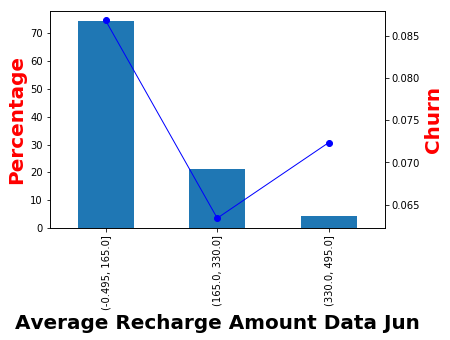

In [42]:
temp = outliers(telecom_1.copy(),'av_rech_amt_data_6',3)
graph(temp, temp.av_rech_amt_data_6_bin, "Average Recharge Amount Data Jun")

#### Average Recharge Amount Data (Mobile Internet) for Jul

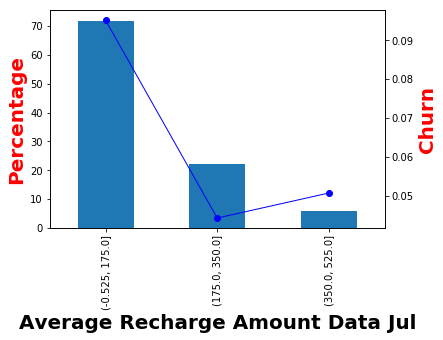

In [43]:
temp = outliers(telecom_1.copy(),'av_rech_amt_data_7',3)
graph(temp, temp.av_rech_amt_data_7_bin, "Average Recharge Amount Data Jul")

#### Average Recharge Amount Data (Mobile Internet) for Aug

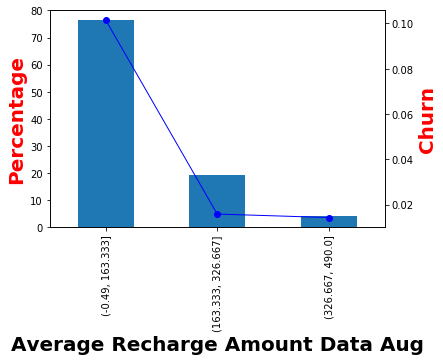

In [44]:
temp = outliers(telecom_1.copy(),'av_rech_amt_data_8',3)
graph(temp, temp.av_rech_amt_data_8_bin, "Average Recharge Amount Data Aug")

Inference - As per the above 3 graphs for Average Recharge Amount for Data (Mobile Internet), we find that the people who fall in the low recharge category are the people who churn significantly. This could be possible that there are lesser recharge plan options for this price range. Possible other service providers have better data offers which may lead to this trend. Whereas the trend for reduction in churn for customers with higher average recharge amount may be attributed to some change in plans or service. 

#### Total Recharge Amount for Jun

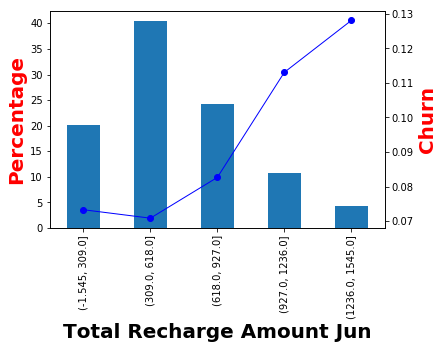

In [45]:
temp = outliers(telecom_1.copy(),'total_rech_amt_6',5)
graph(temp, temp.total_rech_amt_6_bin, "Total Recharge Amount Jun")

#### Total Recharge Amount for Jul

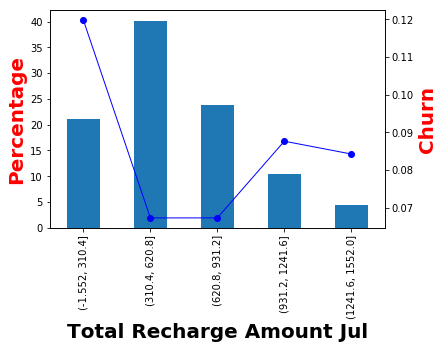

In [46]:
temp = outliers(telecom_1.copy(),'total_rech_amt_7',5)
graph(temp, temp.total_rech_amt_7_bin, "Total Recharge Amount Jul")

#### Total Recharge Amount for Aug

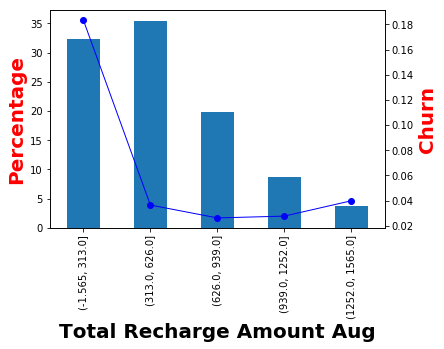

In [47]:
temp = outliers(telecom_1.copy(),'total_rech_amt_8',5)
graph(temp, temp.total_rech_amt_8_bin, "Total Recharge Amount Aug")

Inference - As per the above 3 graphs for Total Recharge Amount, we observe that customers who do high value recharge in June show highest churn rate in June, however in the subsequent months, the churn is lesser for this category. Whereas the customers who fall in low recharge category show an increase in trend for churning rate in the months post June. Possible this may be due to same change in Plan or service provided.

#### Average Revenue per User for Jun

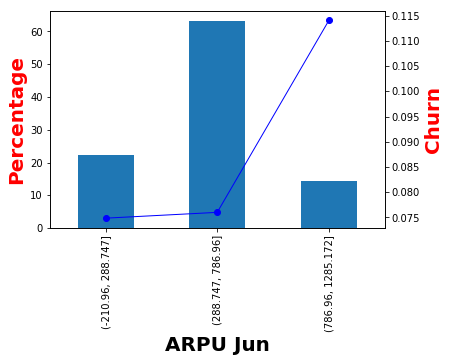

In [48]:
temp = outliers(telecom_1.copy(),'arpu_6',3)
graph(temp, temp.arpu_6_bin, "ARPU Jun")

#### Average Revenue per User for Jul

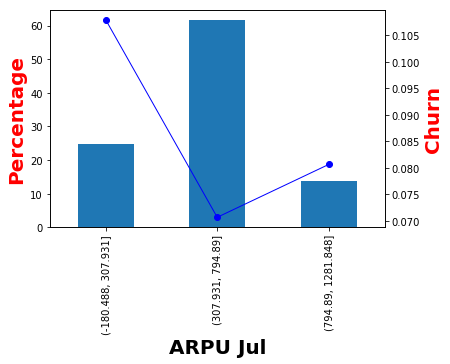

In [49]:
temp = outliers(telecom_1.copy(),'arpu_7',3)
graph(temp, temp.arpu_7_bin, "ARPU Jul")

#### Average Revenue per User for Aug

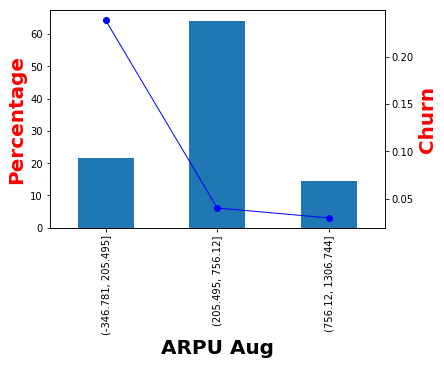

In [50]:
temp = outliers(telecom_1.copy(),'arpu_8',3)
graph(temp, temp.arpu_8_bin, "ARPU Aug")

Inference - As per the above 3 graphs for Average Revenue for User, we observe that customers who generate high revenue in June show highest churn rate in June, however in the subsequent months, the churn is lesser for this category. Whereas the customers who fall in low revenue category show an increase in trend for churning rate in the months post June. Possible this may be due to same change in Plan or service provided. 

#### Total Recharge Data (Mobile Internet) for Jun 

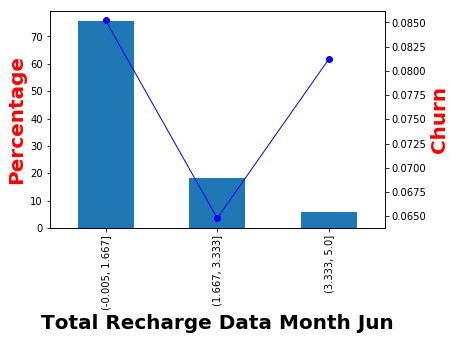

In [51]:
temp = outliers(telecom_1.copy(),'total_rech_data_6',3)
graph(temp, temp.total_rech_data_6_bin, "Total Recharge Data Month Jun")

#### Total Recharge Data (Mobile Internet) for Jul

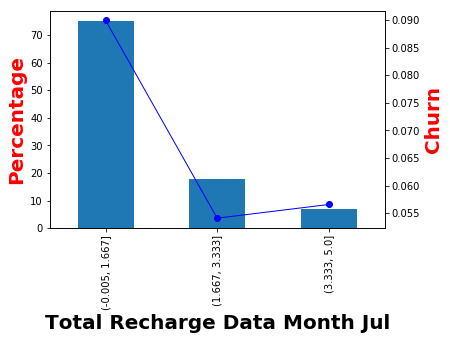

In [52]:
temp = outliers(telecom_1.copy(),'total_rech_data_7',3)
graph(temp, temp.total_rech_data_7_bin, "Total Recharge Data Month Jul")

#### Total Recharge Data (Mobile Internet) for Aug

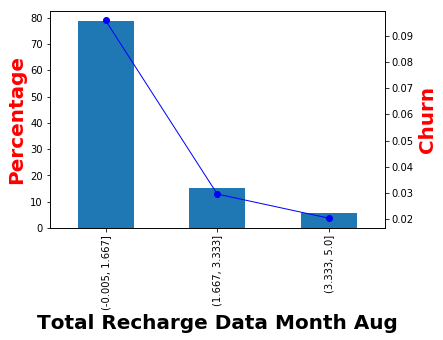

In [53]:
temp = outliers(telecom_1.copy(),'total_rech_data_8',3)
graph(temp, temp.total_rech_data_8_bin, "Total Recharge Data Month Aug")

Inference - As per the above 3 graphs for Total Recharge for Data, we find that the people who fall in the low recharge category are the people who churn significantly. Whereas the trend for reduction in churn for customers with higher Total Recharge data may be attributed to some change in plans or service.

#### Duration of Recharge

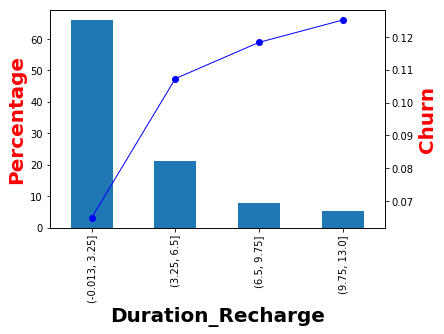

In [54]:
temp = outliers(telecom_1.copy(),'duration_recharge',4)
graph(temp, temp.duration_recharge_bin, "Duration_Recharge")

Inference - We observe, that as the duration of the recharge increases, the rate of customer churn also becomes higher. 

## Separating Dependent and Independent Variables for Modelling

In [55]:
from sklearn.model_selection import train_test_split
var_6 = ['churn','mobile_number','date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
               'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
               'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
# Putting feature variable to X
X = telecom_1.drop(var_6,axis=1)

# Putting response variable to y
y = telecom_1['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

## Checking for Class Imbalance

In [56]:
#checking if dataset is balanced
churn = (sum(y)/len(y.index))*100
churn

8.122725603445398

## Treating Class Imbalance

Since there exist high Class Imbalance, we do Under Sampling to treat this difference

In [57]:
from imblearn.under_sampling import RandomUnderSampler

# Apply the random under-sampling
ind = RandomUnderSampler(return_indices=True)
X_res, y_res, idx = ind.fit_sample(X, y)

In [58]:
y_res=pd.DataFrame(y_res)

# Renaming the column '0' as 'churn'
y_res= y_res.rename(columns={ 0 : 'churn'})
X_res=pd.DataFrame(X_res,columns=X.columns)

In [59]:
churn = (sum(y_res.churn)/len(y_res.churn))*100
churn 

50.0

#### After undersampling, the churn rate is 50% . 

In [60]:
## Standardising the features
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_res)
norm_X_data=scaler.transform(X_res)

In [61]:
norm_X_data =pd.DataFrame(norm_X_data,columns=X.columns)
norm_X_data.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   -0.44   -0.22   -0.15        -0.44        -0.34        -0.27   
1   -0.90    0.79   -0.03        -0.54         0.20         0.10   
2   -0.91   -0.80   -0.61        -0.55        -0.53        -0.42   
3   -0.11    0.49   -0.41         1.03         2.64         0.08   
4   -0.13   -0.50    0.06        -0.47        -0.40         0.07   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         -0.45         -0.39         -0.39          -0.20          -0.18   
1         -0.58          2.24          0.71           0.28          -0.18   
2         -0.67         -0.68         -0.58          -0.20          -0.18   
3          0.42          0.05         -0.45          -0.20          -0.18   
4          0.04         -0.42          0.33          -0.20          -0.18   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          -0.18          -0.23          -0.25          -0.21   
1          -0.18          -0.23          -0.25          -0.21   
2          -0.18          -0.23          -0.25          -0.21   
3          -0.18          -0.23          -0.25          -0.21   
4          -0.18          -0.23          -0.25          -0.21   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             -0.26             -0.32             -0.31             -0.59   
1             -0.32             -0.00             -0.10             -0.58   
2             -0.31             -0.33             -0.33             -0.45   
3             -0.28             -0.29              0.16             -0.27   
4             -0.10              0.03              1.06              1.25   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             -0.56             -0.49             -0.19             -0.21   
1             -0.20             -0.38             -0.19              1.38   
2             -0.54             -0.50             -0.19             -0.21   
3             -0.14             -0.42             -0.15             -0.17   
4             -0.05              0.84             -0.12              0.91   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             -0.29             -0.26             -0.20             -0.22   
1              0.28             -0.22             -0.08             -0.22   
2             -0.29             -0.26             -0.20             -0.22   
3             -0.29             -0.26              2.41             -0.13   
4              8.84             -0.26             -0.20             -0.22   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         -0.56         -0.58         -0.51             -0.34   
1         -0.60         -0.04         -0.31             -0.41   
2         -0.50         -0.57         -0.54             -0.44   
3         -0.37         -0.28         -0.23              1.28   
4          0.76          0.05          1.56             -0.44   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             -0.21             -0.14             -0.15             -0.12   
1              0.24              0.18             -0.31              2.59   
2             -0.41             -0.30             -0.47             -0.45   
3              3.01              0.06              0.67              0.07   
4             -0.41             -0.30             -0.46             -0.43   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             -0.12             -0.15             -0.14             -0.13   
1              1.16             -0.15             -0.14             -0.00   
2             -0.35             -0.15             -0.14             -0.13   
3             -0.23             -0.15             -0.14             -0.13   
4             -0.35             -0.15             -0.14             -0.13   

   std_og_mou_6  std_og_mou_7  std

In [62]:
## Splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(norm_X_data,y_res, train_size=0.7,test_size=0.3,random_state=100)

# Dimentionality Reduction using PCA

In [63]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [64]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

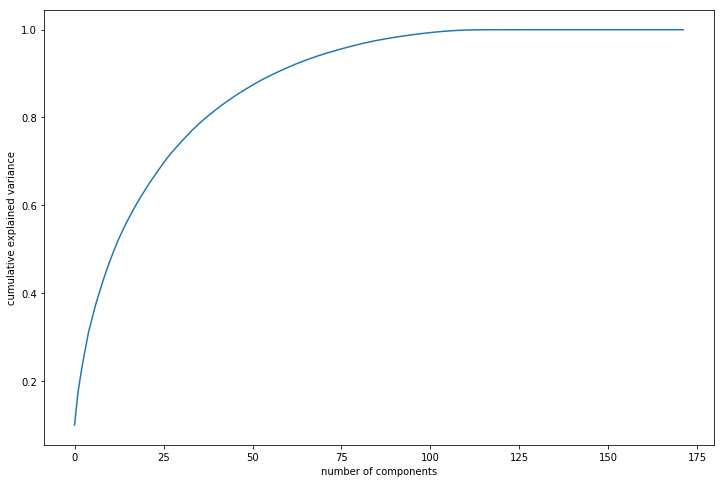

In [65]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### From the above plot, we can decipher that we can choose upto 80 components to explain more than 95 percent of the variance

In [66]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [67]:
train_pca = pca_final.fit_transform(X_train)
train_pca.shape

(3406, 80)

### Checking if correlations within principal components are zero

In [68]:
diag = np.corrcoef(train_pca.transpose()) - np.diagflat(np.corrcoef(train_pca.transpose()).diagonal())
print("max corr:",diag.max(), ", min corr: ", diag.min(),)


max corr: 0.042005557987552566 , min corr:  -0.04388141041255741


Correlation does seem to be very close to 0

In [69]:
test_pca = pca_final.transform(X_test)
test_pca.shape

(1460, 80)

## Evaluating different Classifiers 

### 1. Logistic Regression - Using Top Predictors which were revealed in EDA

In [70]:
# Training Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log = LogisticRegression()
model_1 = log.fit(train_pca,y_train)

In [71]:
# Predict on Test
pred_test = model_1.predict_proba(test_pca)

In [72]:
y_pred_df = pd.DataFrame(pred_test)
y_pred = y_pred_df.iloc[:,[1]]

In [73]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [74]:
y_pred_final = pd.concat([y_test,y_pred],axis=1)

In [75]:
y_pred_final= y_pred_final.rename(columns={ 1 : 'prob'})

### Calculate AUC and optimal threshold using ROC curve

In [76]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.prob)
auc = auc(fpr, tpr)
print(auc)

0.8869542697573866


In [77]:
# Check Optimal cut-off
def Cutoff(tar, pred):

    fpr, tpr, thresh = roc_curve(tar, pred)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(thresh, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [78]:
# Calculate optimal threshold
threshold = Cutoff(y_pred_final.churn,y_pred_final.prob)
threshold

[0.503151625187737]

In [79]:
# Create New column and update with 1 if Churn_Prob > 0.52 else 0
y_pred_final['predicted_churn'] = y_pred_final.prob.map( lambda x: 1 if x > 0.52 else 0)

In [80]:
y_pred_final.churn.value_counts()

0    736
1    724
Name: churn, dtype: int64

In [81]:
# Check Confusion Matrix
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted_churn )
print(confusion)

[[603 133]
 [138 586]]


In [82]:
true_negative= confusion[0,0] # true_negative
true_positive = confusion[1,1] # true_positive
false_positive = confusion[0,1] # false_positive
false_negative = confusion[1,0] # false_negative

In [83]:
#Precision
true_positive / float(true_positive+false_positive)

0.8150208623087621

In [84]:
#Recall
true_positive / float(true_positive+false_negative )

0.8093922651933702

In [85]:
#False Postive Rate 
print(false_positive/ float(true_negative+false_positive))

0.18070652173913043


In [86]:
# Misclassification rate

(false_negative+false_positive)/(true_positive+true_negative+false_positive+false_negative)

0.18561643835616437

As we are looking for more sensitivity (TPR) we can check optimal cutoff using ROC Curve

### Observing ROC Curve

In [87]:
def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

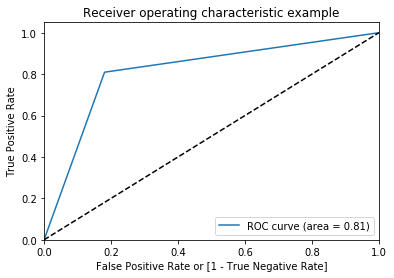

(array([0.        , 0.18070652, 1.        ]),
 array([0.        , 0.80939227, 1.        ]),
 array([2, 1, 0]))

In [88]:
roc(y_pred_final.churn, y_pred_final.predicted_churn)

### 2. Decision Tree Classifier using Grid Search on PCA Data

In [89]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [90]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.11          0.01             0.00            0.00   
1           0.10          0.00             0.00            0.00   
2           0.09          0.00             0.00            0.00   
3           0.09          0.00             0.00            0.00   
4           0.12          0.00             0.00            0.00   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                     50   
1         entropy               5                     50   
2         entropy               5                    100   
3         entropy               5                    100   
4         entropy              10                     50   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0               0.80               0.81               0.81               0.77   
1               0.80               0.81               0.81               0.77   
2               0.77               0.79               0.79               0.77   
3               0.77               0.79               0.79               0.77   
4               0.80               0.82               0.80               0.77   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0               0.75             0.79            0.02                4   
1               0.76             0.79            0.02                2   
2               0.75             0.77            0.01               11   
3               0.75             0.77            0.02                9   
4               0.75             0.79            0.03                3   

   split0_train_score  split1_train_score  split2_train_score  \
0                0.82                0.82                0.81   
1                0.82                0.82                0.81   
2                0.79                0.79                0.79   
3                0.79                0.79                0.79   
4                0.82                0.82                0.82   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0                0.81                0.82              0.82             0.00  
1                0.81                0.82              0.82             0.00  
2                0.79                0.80              0.79             0.01  
3                0.79                0.80              0.79             0.01  
4                0.82                0.82              0.82             0.00

In [91]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7915443335290664
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [92]:
clf = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [93]:
y_pred = clf.predict(test_pca)
confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[552, 184],
       [145, 579]])

In [94]:
true_negative= confusion[0,0] # true_negative
true_positive = confusion[1,1] # true_positive
false_positive = confusion[0,1] # false_positive
false_negative = confusion[1,0] # false_negative


In [95]:
#Precision
true_positive / float(true_positive+false_positive)

0.7588466579292268

In [96]:
#Recall
true_positive / float(true_positive+false_negative )

0.7997237569060773

### 3. XG Boost Classifier using Grid Search on PCA Data

In [97]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc

In [98]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'max_depth': [4,8,10]}          


# specify model
xgb_model = XGBClassifier(max_depth=5, n_estimators=200)

# set up GridSearchCV()
model = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [99]:
model.fit(train_pca,y_train) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9], 'max_depth': [4, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [100]:
cv = pd.DataFrame(model.cv_results_)


In [101]:
print('We can get accuracy of',model.best_score_,'using',model.best_params_)

We can get accuracy of 0.8990402156753348 using {'learning_rate': 0.2, 'max_depth': 8, 'subsample': 0.9}


In [102]:
params = {'learning_rate': 0.2,
          'max_depth': 8, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
# fit the model
model.fit(train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [103]:
y_pred = model.predict(test_pca)

confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[595, 141],
       [141, 583]])

In [104]:
#Precision
true_positive / float(true_positive+false_positive)


0.7588466579292268

In [105]:
#Recall

true_positive / float(true_positive+false_negative )

0.7997237569060773

### 4. Random Forest using Grid Search on original Data

In [106]:
#Random Forest Grid Search

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, n_jobs = 1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score='warn', scoring=None, verbose=1)

In [107]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8379330593071052 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300)

In [109]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
y_pred = rfc.predict(X_test)

confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[641,  95],
       [164, 560]])

In [111]:
true_negative= confusion[0,0] # true_negative
true_positive = confusion[1,1] # true_positive
false_positive = confusion[0,1] # false_positive
false_negative = confusion[1,0] # false_negative

In [112]:
#Precision
true_positive / float(true_positive+false_positive)



0.8549618320610687

In [113]:
#Recall

true_positive / float(true_positive+false_negative )

0.7734806629834254

## Feature Selection using Random Forest

In [114]:
from collections import OrderedDict
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [115]:
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=30
n_items = take(n, dic.items())

### Top 30 Features from Random Forest

In [116]:
n_items

[('loc_ic_t2m_mou_8', 0.04704760297678692),
 ('total_ic_mou_8', 0.04701984377960491),
 ('loc_ic_mou_8', 0.0432442118327622),
 ('total_og_mou_8', 0.038073360362513915),
 ('loc_og_t2m_mou_8', 0.036629470016121296),
 ('arpu_8', 0.035413249501205696),
 ('loc_ic_t2t_mou_8', 0.034832056180468245),
 ('last_day_rch_amt_8', 0.03414256128993052),
 ('total_rech_amt_8', 0.0306219482289453),
 ('loc_og_t2t_mou_8', 0.02929478420947027),
 ('loc_og_mou_8', 0.027659431790563963),
 ('max_rech_amt_8', 0.02672801357565389),
 ('max_rech_data_8', 0.02135125524031066),
 ('av_rech_amt_data_8', 0.02064818853522577),
 ('duration_recharge', 0.020082074104307696),
 ('loc_ic_t2f_mou_8', 0.019117290918637384),
 ('std_ic_mou_8', 0.01856549428735519),
 ('loc_og_mou_7_8', 0.018106323907578315),
 ('offnet_mou_8', 0.017477187345117332),
 ('total_rech_amt_7_8', 0.01683446512940548),
 ('offnet_mou_7_8', 0.016439167445861706),
 ('duration_date_of_last_rech_8', 0.016230692801591628),
 ('total_og_mou_7_8', 0.01607116577936833

## Business Insights 

- On the basis of 'Feature Importance Variables' which we got through Random Forest and EDA, we can infer that the Telecom Company needs to pay more attention to the Local and STD Packages at lower price ranges.
- With respect to Internet and Talktime recharges, duration from last recharge seems to be a key indicator for churn. As delays are observed in recharge patterns, the Telecom Company may consider to do Target Specific Campaigns to retain such customers.
- Significant dip in outgoing and incoming calls from Jul to Aug is also a key indicator for Churn. The Telecom company needs to understand the recharge patterns for these customers.
- Also majority important variables are for the action month of Aug. Here one suggestion is to conduct some type of survey or collect Voice of Customer to understand further sentiments.